In [ ]:

                                                                                                                                                                                                                                                                                                                    import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from time import time

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/My Drive/Project_3/Dataset/train.csv")
train.sort_values(by="Date", ascending = True, inplace = True)

train = train[train.Sales > 1]

store = pd.read_csv("/content/drive/My Drive/Project_3/Dataset/store.csv")
data = pd.merge(train, store, on = 'Store')

train = data
temp = pd.read_csv("/content/drive/My Drive/Project_3/Dataset/test.csv")
test = pd.merge(temp, store, on = 'Store')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(data)

        Store  DayOfWeek  ... Promo2SinceYear    PromoInterval
0         353          2  ...          2013.0  Feb,May,Aug,Nov
1         353          3  ...          2013.0  Feb,May,Aug,Nov
2         353          4  ...          2013.0  Feb,May,Aug,Nov
3         353          5  ...          2013.0  Feb,May,Aug,Nov
4         353          6  ...          2013.0  Feb,May,Aug,Nov
...       ...        ...  ...             ...              ...
844333   1081          1  ...             NaN              NaN
844334   1081          2  ...             NaN              NaN
844335   1081          3  ...             NaN              NaN
844336   1081          4  ...             NaN              NaN
844337   1081          5  ...             NaN              NaN

[844338 rows x 18 columns]


In [ ]:
data.shape

(844338, 18)

In [ ]:
test.shape

(41088, 17)

In [ ]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
Date_month                        0
Date_week                         0
Date_Year                         0
Date_day                          0
Year                              0
Month                             0
Day                               0
StoreType1                        0
Assortment1                       0
dtype: int64

In [ ]:
test.apply(lambda x: sum(x.isnull()), axis = 0)

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [ ]:
len(data[data.Open == 0])

0

In [ ]:
len(test[test.Open == 0])

5984

In [ ]:
test.loc[(test.Open.isnull()), 'Open'] = 1
data.loc[(data.CompetitionDistance.isnull()), 'CompetitionDistance'] = data['CompetitionDistance'].mean()
test.loc[(test.CompetitionDistance.isnull()), 'CompetitionDistance'] = data['CompetitionDistance'].mean()

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,353,2,2013-01-01,3139,820,1,0,a,1,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,353,3,2013-01-02,2686,835,1,0,0,1,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
2,353,4,2013-01-03,2628,815,1,0,0,1,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
3,353,5,2013-01-04,2677,856,1,0,0,1,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
4,353,6,2013-01-05,2224,719,1,0,0,0,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"


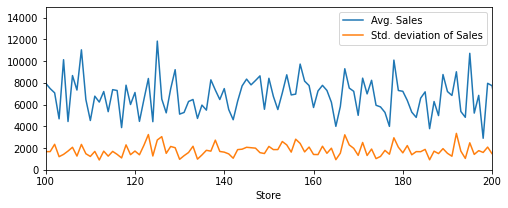

In [ ]:
plt.figure(figsize(8,3))
data.groupby('Store')['Sales'].mean().plot(xlim = (100,200), ylim=(0,15000), legend = True, label = 'Avg. Sales')
data.groupby('Store')['Sales'].std().plot(xlim = (100,200), ylim=(0,15000), legend = True, label = 'Std. deviation of Sales')

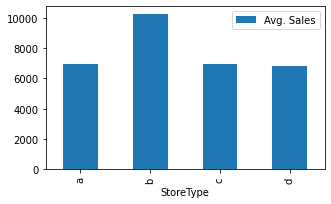

In [ ]:
plt.figure(figsize(5,3))
data.groupby('StoreType')['Sales'].mean().plot(kind = 'bar', legend = True, label = 'Avg. Sales')

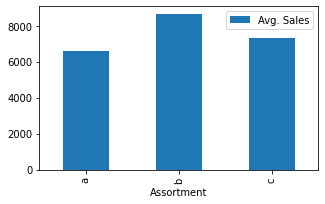

In [ ]:
plt.figure(figsize(5,3))
data.groupby('Assortment')['Sales'].mean().plot(kind = 'bar', legend = True, label = 'Avg. Sales')

Text(0, 0.5, 'Avg. sales')

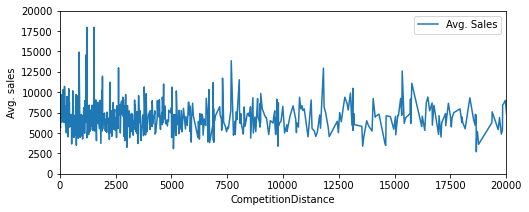

In [ ]:
plt.figure(figsize(8,3))
data.groupby('CompetitionDistance')['Sales'].mean().plot(xlim = (0,20000), ylim = (0,20000), legend = True, label = 'Avg. Sales')
plt.ylabel('Avg. sales')

Text(0, 0.5, 'Avg. Sales in $')

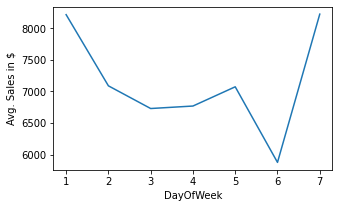

In [ ]:
plt.figure(figsize(5,3))
data.groupby('DayOfWeek')['Sales'].mean().plot().set_ylabel("Avg. Sales in $")

In [ ]:
data.groupby(['DayOfWeek', 'Open'])['Open'].size()

DayOfWeek  Open
1          1       137557
2          1       143955
3          1       141922
4          1       134626
5          1       138633
6          1       144052
7          1         3593
Name: Open, dtype: int64

Text(0.5, 0, 'Month')

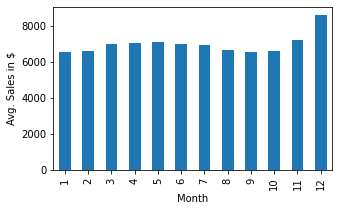

In [ ]:
data['Date_month'] = pd.to_datetime(data['Date']).dt.month
data.groupby('Date_month')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')
plt.xlabel('Month')

Text(0.5, 0, 'Week of the year')

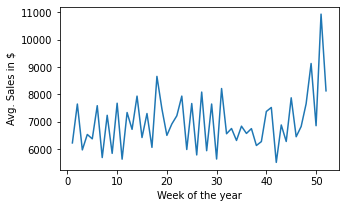

In [ ]:
data['Date_week'] = pd.to_datetime(data['Date']).dt.weekofyear
data.groupby('Date_week')['Sales'].mean().plot().set_ylabel('Avg. Sales in $')
plt.xlabel('Week of the year')


Text(0.5, 0, 'Year')

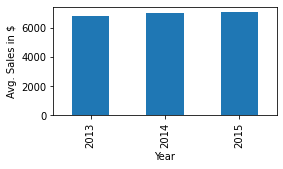

In [ ]:
plt.figure(figsize(4,2))
data['Date_Year'] = pd.to_datetime(data['Date']).dt.year
data.groupby('Date_Year')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

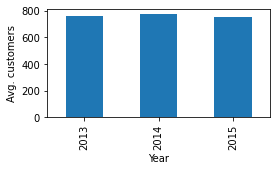

In [ ]:
plt.figure(figsize(4,2))
data['Date_Year'] = pd.to_datetime(data['Date']).dt.year
data.groupby('Date_Year')['Customers'].mean().plot(kind='bar').set_ylabel('Avg. customers')
plt.xlabel('Year')

Text(0.5, 0, 'Day of the year')

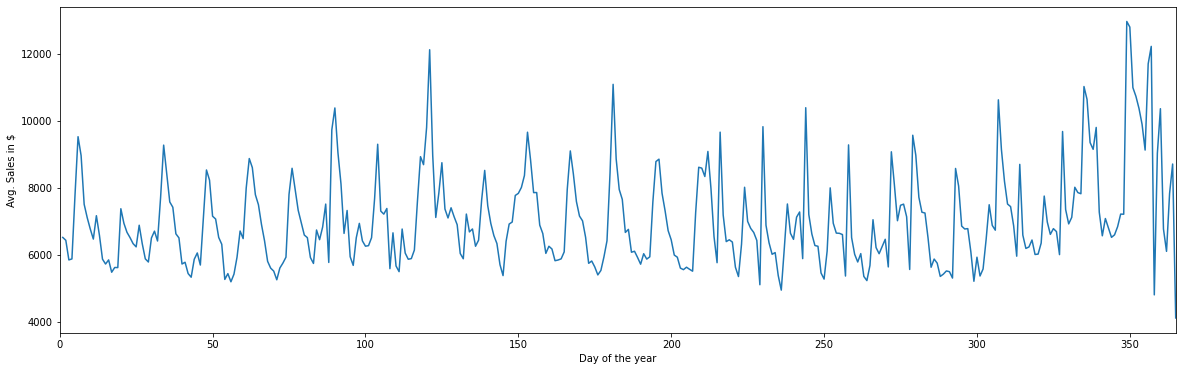

In [ ]:
plt.figure(figsize(20,6))
data['Date_day'] = pd.to_datetime(data['Date']).dt.dayofyear
data.groupby('Date_day')['Sales'].mean().plot(xlim=(0,365))
plt.ylabel('Avg. Sales in $')
plt.xlabel('Day of the year')

Text(0.5, 0, 'Day of the year')

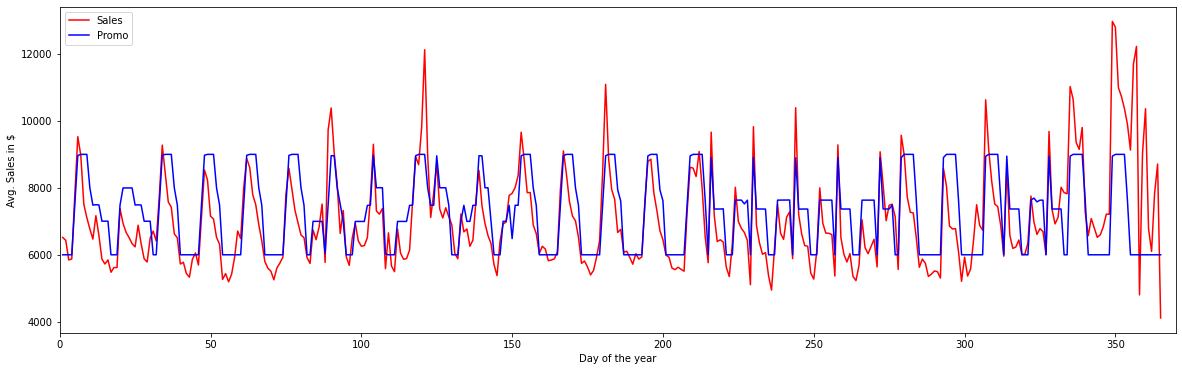

In [ ]:
plt.figure(figsize(20,6))
# print(data['Sales'], data['Promo'])
x = data.groupby('Date_day')['Date_day'].mean()
y = data.groupby('Date_day')['Sales'].mean()
z = 6000+3000*data.groupby('Date_day')['Promo'].mean()
plt.plot(x,y,color = 'red', label = 'Sales')
plt.plot(x,z, color = 'blue', label = 'Promo')
plt.legend()
plt.xlim([0,370])
plt.ylabel('Avg. Sales in $')
plt.xlabel('Day of the year')

6934.631986648479

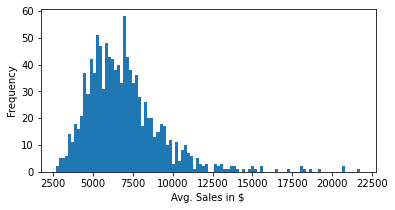

In [ ]:
plt.figure(figsize(6,3))
data.groupby('Store')['Sales'].mean().plot.hist(bins=100).set_xlabel("Avg. Sales in $")
data.groupby('Store')['Sales'].mean().mean()

Text(0.5, 0, 'Month')

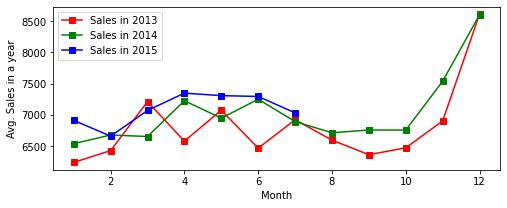

In [ ]:
 plt.figure(figsize(8,3))
y1 = data.loc[data['Date_Year'] == 2013].groupby('Date_month')['Sales'].mean()
y2 = data.loc[data['Date_Year'] == 2014].groupby('Date_month')['Sales'].mean()
y3 = data.loc[data['Date_Year'] == 2015].groupby('Date_month')['Sales'].mean()
x = [1,2,3,4,5,6,7,8,9,10,11,12]
x1 = [1,2,3,4,5,6,7]
#x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x,y1,marker='s', color = 'red', label = 'Sales in 2013')
plt.plot(x,y2,marker='s',color = 'green', label = 'Sales in 2014')
plt.plot(x1,y3,marker='s',color = 'blue', label = 'Sales in 2015')
plt.legend()
plt.ylabel('Avg. Sales in a year')
plt.xlabel('Month')

Text(0.5, 0, 'Promo')

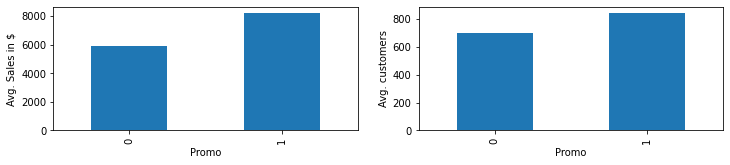

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
plt.subplot(221)
data.groupby('Promo')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')
plt.subplot(222)
data.groupby('Promo')['Customers'].mean().plot(kind='bar').set_ylabel('Avg. customers')
plt.xlabel('Promo')

Text(0, 0.5, 'Avg. Sales in $')

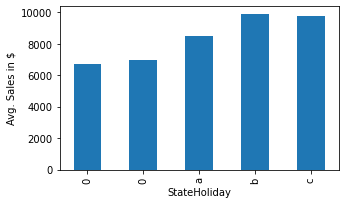

In [ ]:
plt.figure(figsize(5,3))
data.groupby('StateHoliday')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')

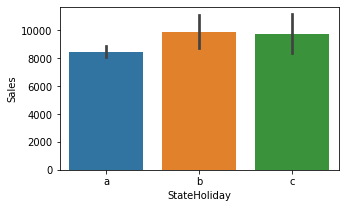

In [ ]:
mask = ((data["StateHoliday"] != 0) & (data["StateHoliday"] != "0"))
sns.barplot(x='StateHoliday', y='Sales', data=data[mask])

Text(0, 0.5, 'Avg. Sales in $')

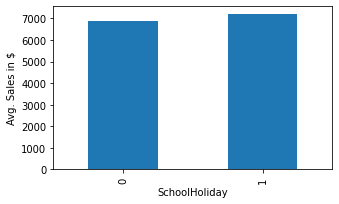

In [ ]:
data.groupby('SchoolHoliday')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')

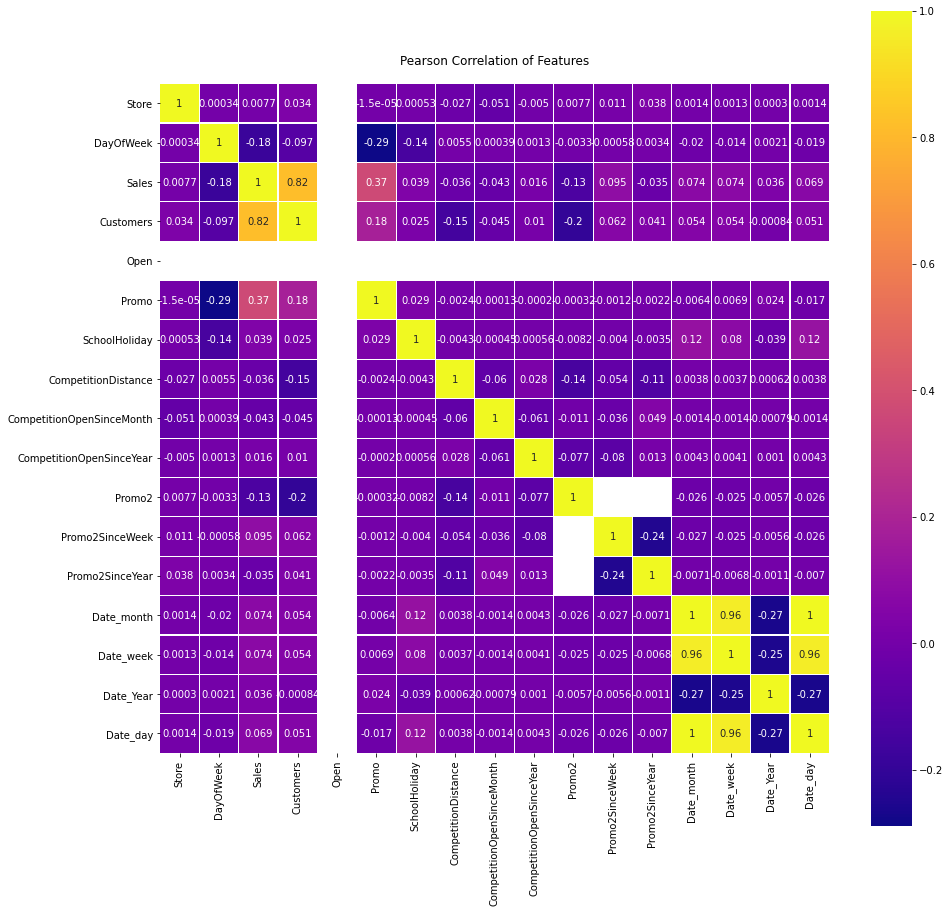

In [ ]:
colormap = plt.cm.plasma
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.02, size=12)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

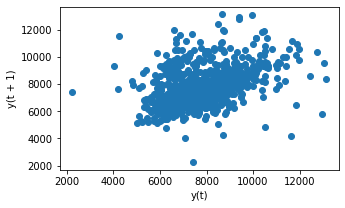

In [ ]:
lag_plot(data.loc[data['Store'] == 200]['Sales'])

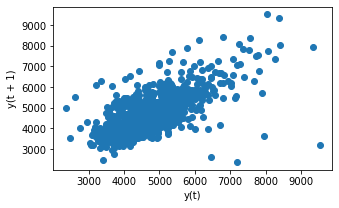

In [ ]:
lag_plot(data.loc[data['Store'] == 1]['Sales'])

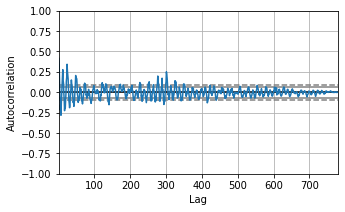

In [ ]:
autocorrelation_plot(data.loc[data['Store'] == 200]['Sales'])

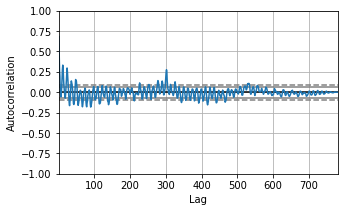

In [ ]:
autocorrelation_plot(data.loc[data['Store'] == 1]['Sales'])

In [ ]:
dic = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day
data['StoreType1'] = data['StoreType'].map(dic).astype(int)
data['Assortment1'] = data['Assortment'].map(dic).astype(int)
     
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['StoreType1'] = test['StoreType'].map(dic).astype(int)
test['Assortment1'] = test['Assortment'].map(dic).astype(int)

In [ ]:
test.head().T

,0,1,2,3,4
Id,1,857,1713,2569,3425
Store,1,1,1,1,1
DayOfWeek,4,3,2,1,7
Date,2015-09-17,2015-09-16,2015-09-15,2015-09-14,2015-09-13
Open,1,1,1,1,0
Promo,1,1,1,1,0
StateHoliday,0,0,0,0,0
SchoolHoliday,0,0,0,0,0
StoreType,c,c,c,c,c
Assortment,a,a,a,a,a
